**Customer Churn Data Analysis of E-Commerce**

By:

Altifani Rizky Hayyu: Data pre-processing, insight, making ppt

Mohammad Abyannaufal Aditya Kusuma: EDA, insight, and visualization, making ppt

Raden Bagus Muhammad AdryanPutra Adhy Wijaya: Machine learning modeling and evaluation, making ppt



Dataset has been taken from: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

# Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Data Acquisition and Understanding

In [ ]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.shape

(5630, 20)

From data.info() we get the information that:
* Dataframe has 5630 rows and 20 variables/columns
* Dataframe still has NaN in some of its variables/columns
* The classification target is the "churn" variable with type "int64" and the rest are features

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

From this information, features that are categorized as categorical and numeric can be separated

In [ ]:
cats = ["PreferredLoginDevice","PreferredPaymentMode","Gender","PreferedOrderCat","MaritalStatus"]
nums = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
        'NumberOfDeviceRegistered', 'SatisfactionScore', 
        'NumberOfAddress','Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']
target = ["Churn"]

In [ ]:
# Doing sampling to understand the data
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2392,52393,0,6.0,Computer,3,13.0,Credit Card,Male,2.0,3,Laptop & Accessory,5,Married,1,0,14.0,1.0,1.0,3.0,143.73
5493,55494,1,10.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Fashion,4,Married,7,0,22.0,2.0,2.0,8.0,198.14
1446,51447,0,5.0,Phone,1,6.0,Debit Card,Male,NaN,3,Mobile,5,Single,2,0,13.0,0.0,1.0,0.0,129.56
5105,55106,0,24.0,Mobile Phone,1,35.0,Debit Card,Female,3.0,4,Grocery,5,Married,6,1,NaN,1.0,2.0,3.0,293.80
3202,53203,0,1.0,Phone,1,10.0,Credit Card,Male,3.0,5,Mobile Phone,2,Single,2,0,14.0,1.0,2.0,2.0,145.45
1224,51225,0,0.0,Phone,1,6.0,Debit Card,Female,NaN,4,Mobile,3,Married,2,1,13.0,0.0,1.0,0.0,129.33
3126,53127,1,1.0,Mobile Phone,1,17.0,Credit Card,Male,3.0,6,Mobile Phone,2,Married,9,0,14.0,1.0,2.0,4.0,159.08
5599,55600,0,10.0,Mobile Phone,3,10.0,Credit Card,Female,4.0,5,Fashion,1,Married,2,0,20.0,1.0,4.0,5.0,201.44
4096,54097,0,28.0,Mobile Phone,1,17.0,Credit Card,Female,4.0,4,Laptop & Accessory,5,Single,8,1,20.0,1.0,2.0,5.0,169.40
479,50480,0,15.0,Phone,1,35.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Divorced,2,0,13.0,2.0,7.0,8.0,144.34


It can be observed that the target variable "churn" has a range of 0 or 1, where 1 is a customer who is proven to have churn

# Descriptive statistics
## Univariate analysis

In [ ]:
# get descriptive statistical information for the variable nums
df[nums].describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Some observations from the *statistical summary* numeric column above:
* The distribution of values from several columns "looks" normal because *mean* and *median* are quite close and the value of Q2 is more or less right in the middle of Q1 - Q3)
* There are some columns that also look skewed

In [ ]:
# get descriptive statistical information for the variable cats
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Some observations from the *statistical summary* categorical column above:
* The majority of data are Male (The top of the column "Gender" is "Male" with a frequency of 3384)
* The distribution of values in all column categories looks dominated by certain values

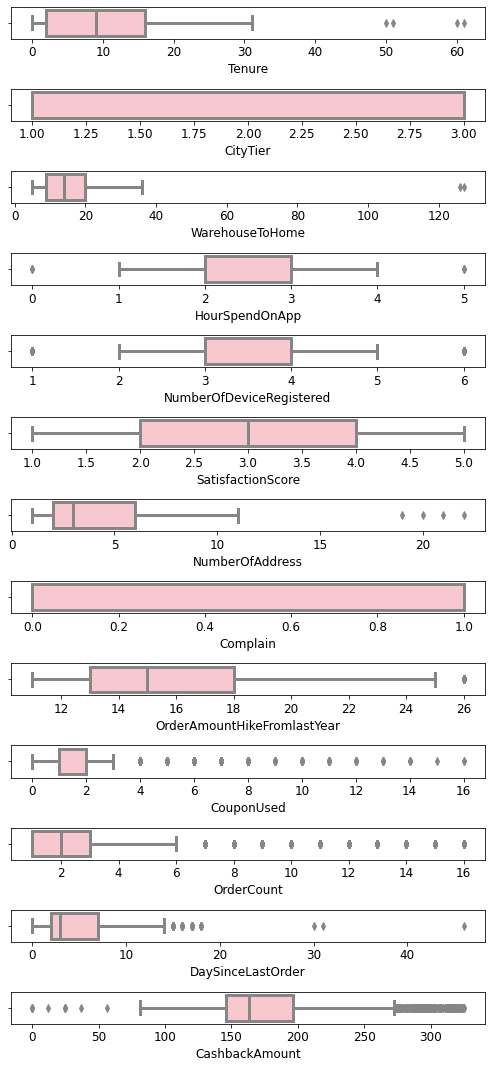

In [ ]:
#boxplot
for i in range(0, len(nums)):
    plt.subplot(len(nums),1,i+1)
    sns.boxplot(df[nums[i]], color='pink', orient='v')
    plt.tight_layout()

We can observe data outliers in each variable by using a boxplot.
* Outliers visible in almost all existing columns
* Outliers to be removed are outliers from numeric variables and only outliers with extreme values

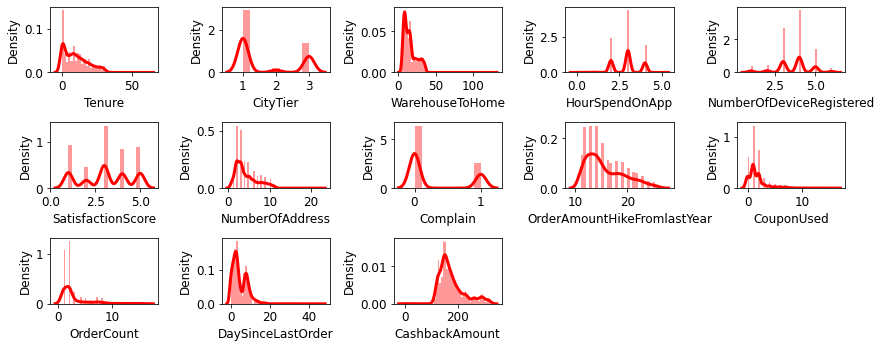

In [ ]:
#displot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

Using the distribution plot, we can observe that:
* Almost no visible variable/column has a normal distribution

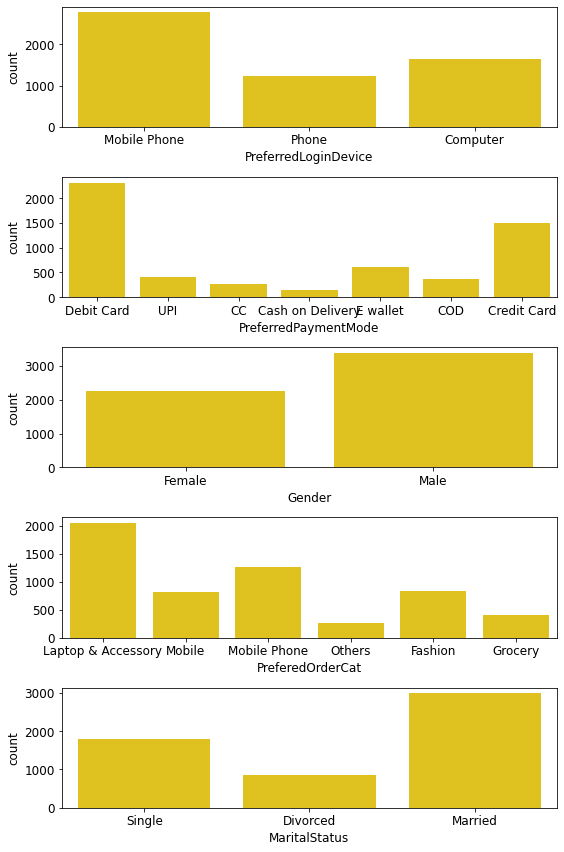

In [ ]:
#barplot
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(5,1,i+1)
    sns.countplot(df[cats[i]], color='gold', orient='v')
    plt.tight_layout()

From the barplot we can see the count value of each value in each variable. We get information that:
* These variables have an uneven distribution of values or focus on only one/a few values

## Bivariate analysis

<AxesSubplot:>

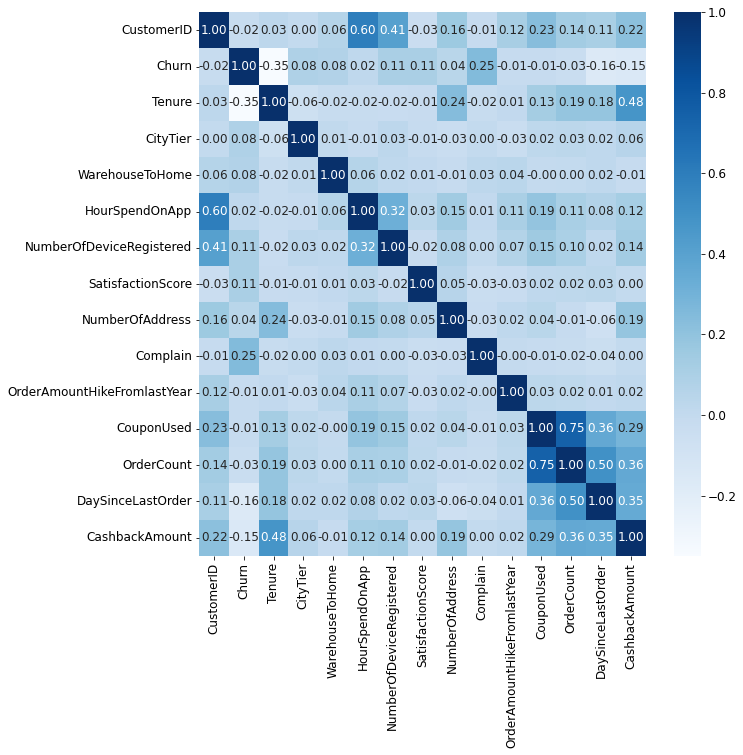

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

From the *correlation plot* above, it can be seen that:
* Target `churn` has weak positive correlation with all variables except 'Tenure' and 'Complain'
* Tenure variable has a high negative correlation with the target variable
* The Complain variable has a fairly high positive correlation with the target variable

# Data Pre-Processing

## Handle Missing Values

In [ ]:
# find the value of missing data
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# drop data for target variable
df.dropna(subset=['Churn'], inplace=True)

In [ ]:
# Numerical and categorical imputation

df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# outlier handling

Outliers that are removed are extreme outliers only

In [ ]:
#Jumlah baris sebelum memfilter outlier = Number of rows before filtering outliers
#Jumlah baris setelah memfilter outlier = Number of rows after filtering outliers

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
df["Tenure"][df["Tenure"]>=50]=np.nan
df=df.dropna()

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5626


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
df["WarehouseToHome"][df["WarehouseToHome"]>=100]=np.nan
df=df.dropna()

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5626
Jumlah baris setelah memfilter outlier: 5624


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
df["NumberOfAddress"][df["NumberOfAddress"]>=15]=np.nan
df=df.dropna()

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5624
Jumlah baris setelah memfilter outlier: 5620


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
df["OrderAmountHikeFromlastYear"][df["OrderAmountHikeFromlastYear"]>=25.7]=np.nan
df=df.dropna()

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5620
Jumlah baris setelah memfilter outlier: 5587


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
df["DaySinceLastOrder"][df["DaySinceLastOrder"]>=29]=np.nan
df=df.dropna()

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5587
Jumlah baris setelah memfilter outlier: 5584


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['CashbackAmount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5584
Jumlah baris setelah memfilter outlier: 5148


## Feature Engineering

In [ ]:
for cat in cats:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

One hot encoding is done because the categorical variables that exist are only as differentiators and have no levels

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 5629
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5148 non-null   int64  
 1   Churn                                  5148 non-null   int64  
 2   Tenure                                 5148 non-null   float64
 3   PreferredLoginDevice                   5148 non-null   object 
 4   CityTier                               5148 non-null   int64  
 5   WarehouseToHome                        5148 non-null   float64
 6   PreferredPaymentMode                   5148 non-null   object 
 7   Gender                                 5148 non-null   object 
 8   HourSpendOnApp                         5148 non-null   float64
 9   NumberOfDeviceRegistered               5148 non-null   int64  
 10  PreferedOrderCat                       5148 non-null   object 
 11  Sati

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'MaritalStatus_Divorced',

# Business Analyst (EDA)

### Churn vs gender

In [ ]:
df.groupby('Churn')['Churn'].count()

Churn
0    4225
1     923
Name: Churn, dtype: int64

In [ ]:
df.groupby('Gender')['Gender'].count()

Gender
Female    2065
Male      3083
Name: Gender, dtype: int64

Male are the most users who use the app

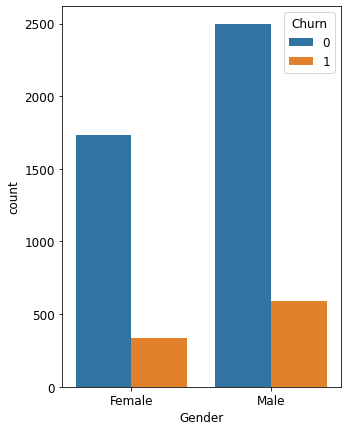

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x = 'Gender', hue = 'Churn', data=df)
plt.show()

Insight = Gender between male and female is not related to churn

### Churn vs MaritalStatus

In [ ]:
df.groupby(['MaritalStatus','Churn'])['MaritalStatus'].count()

MaritalStatus  Churn
Divorced       0         639
               1         118
Married        0        2368
               1         337
Single         0        1218
               1         468
Name: MaritalStatus, dtype: int64

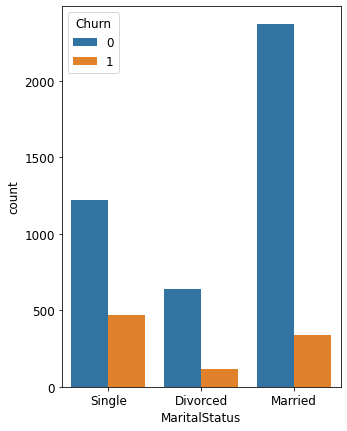

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x = 'MaritalStatus', hue = 'Churn', data=df)
plt.show()

Insight = It can be seen that there are more single customers who churn compared to divorced and married customers

### Churn vs Complain

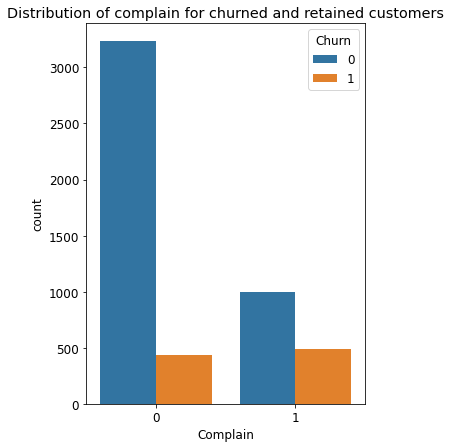

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x='Complain', hue='Churn', data=df)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

Insight = It can be seen that customers who complain have more churn compared to customers who do not complain

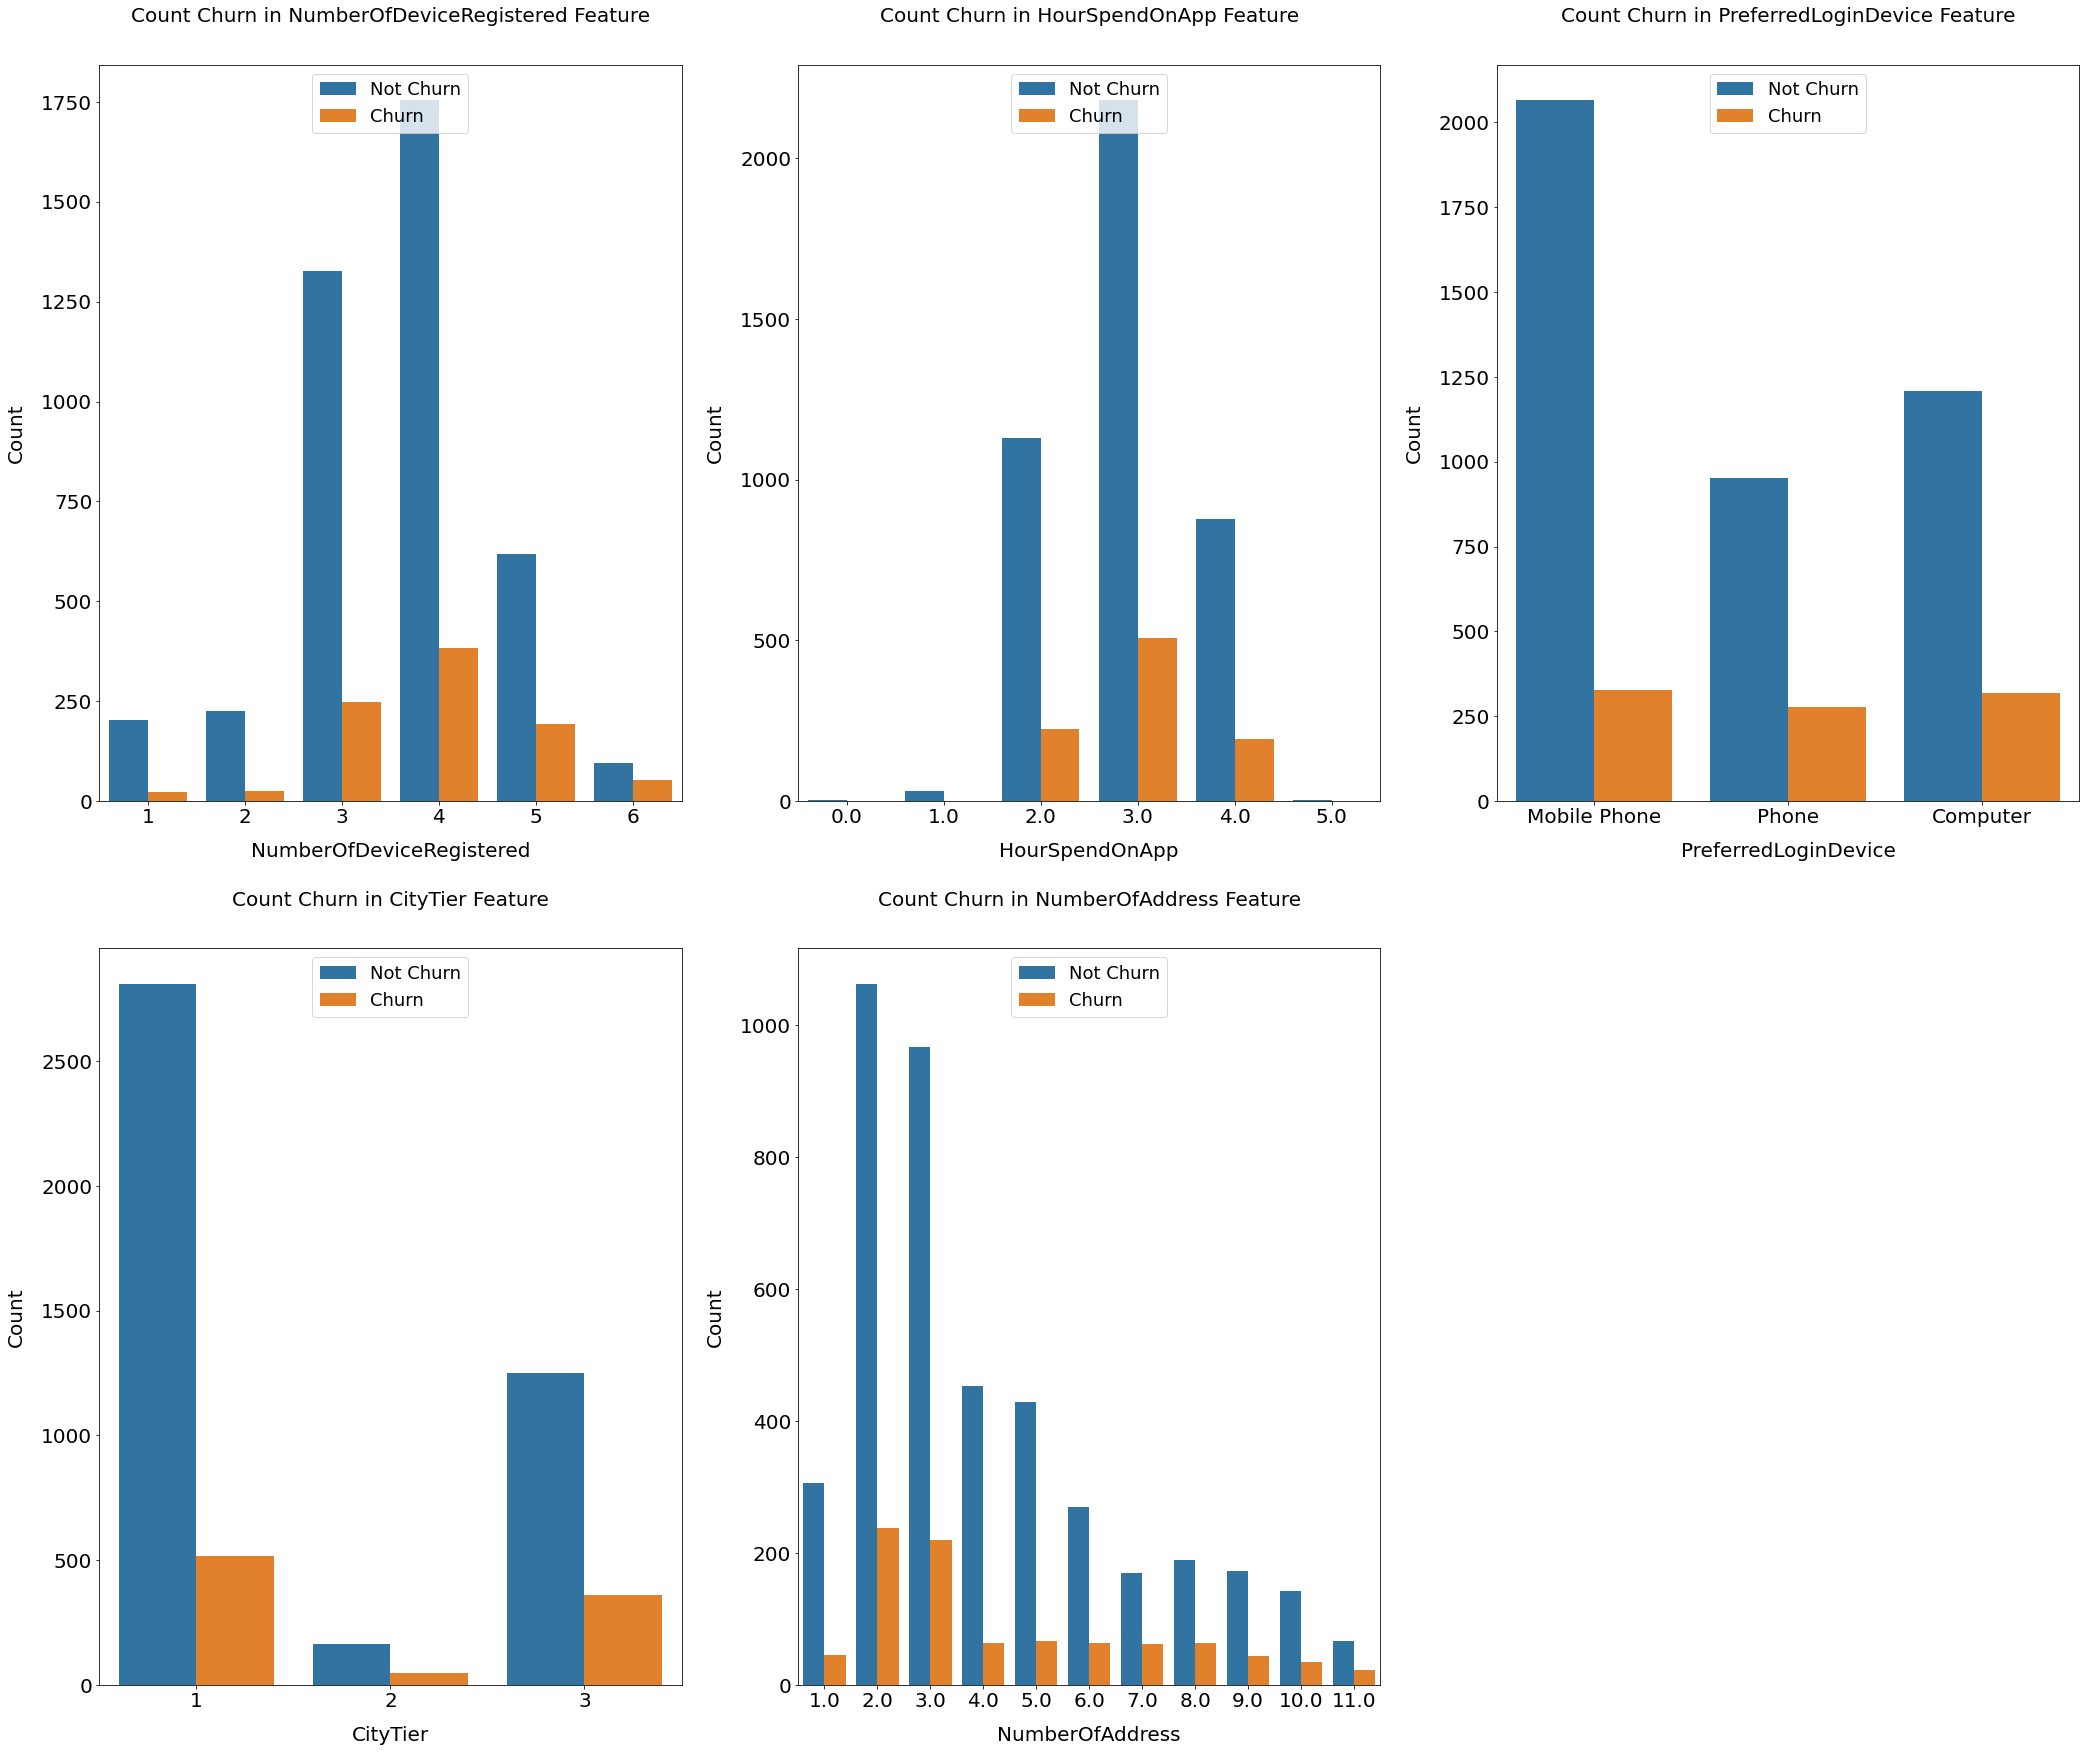

In [ ]:
cat_features = ['NumberOfDeviceRegistered', 'HourSpendOnApp', 'PreferredLoginDevice', 'CityTier', 'NumberOfAddress']

fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (20, 20))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_features, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x = feature, hue = 'Churn', data = df)

  plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
  plt.ylabel('Count', size = 20, labelpad = 15)
  plt.tick_params(axis = 'x', labelsize = 20)
  plt.tick_params(axis = 'y', labelsize = 20)

  plt.legend(['Not Churn', 'Churn'], loc = 'upper center', prop = {'size': 18})
  plt.title('Count Churn in {} Feature'.format(feature), size = 20, y = 1.05)

plt.show()

Insight = It can be seen that the variables above are less correlated with the Churn variable

### Churn vs SatisfactionScore

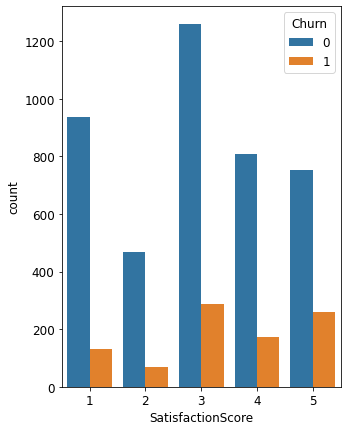

In [ ]:
plt.figure(figsize = (5,7))
sns.countplot(x='SatisfactionScore', hue='Churn', data=df)
plt.show()

Insight = By comparing SatisfactionScore 1 and Statisfaction 5, it can be seen that Satisfaction 5 gives more churn value than Satisfaction 1, so further analysis is needed to score the SatisfactionScore

### Churn vs CashbackAmount

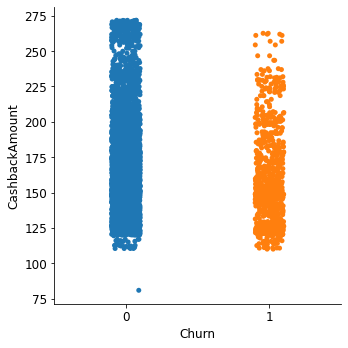

In [ ]:
sns.catplot(data=df, x='Churn', y="CashbackAmount")

Insight = It can be seen that if the CashbackAmount is large (above 225) then fewer customers will churn

### Churn vs Tenure

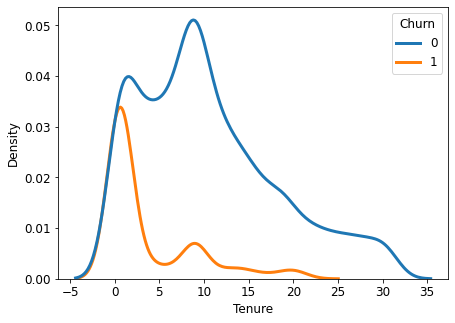

In [ ]:
plt.figure(figsize = (7,5))
sns.kdeplot(x = 'Tenure', hue = 'Churn', data=df)
plt.show()

Insight = Many customers who do not churn at the Tenure value of 10 and many customers who churn at the beginning of using the product/service.

### Churn vs DaySinceLastOrder

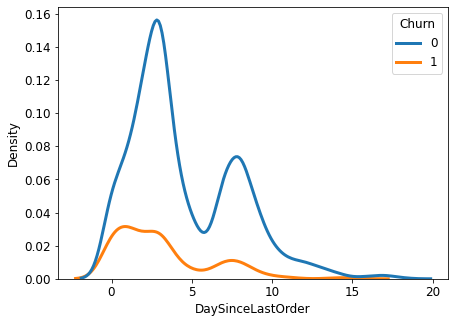

In [ ]:
plt.figure(figsize = (7,5))
sns.kdeplot(x = 'DaySinceLastOrder', hue = 'Churn', data=df)
plt.show()

Insight = Many customers who don't churn who ordered their products 3 days ago. It is recommended to give promotions 3 days after the customer orders so that many customers don't churn

### Churn vs PreferedOrderCat

In [ ]:
# A little preprocessing has been done. New dataframes are used so as not to change the original data
df99 = df.copy()
df99['PreferedOrderCat'] = df99['PreferedOrderCat'].replace(['Mobile'],'Mobile Phone')

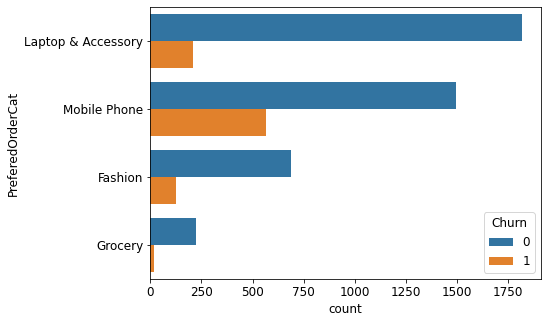

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(y = 'PreferedOrderCat', hue = 'Churn', data = df99, orient = 'v')
plt.show()

Insight = A lot of customer churn when ordering a mobile phone. It is recommended to check the product that ordered the mobile phone whether there is something wrong or not

# ML Preparation and Modelling Experiment

In [ ]:
#df[abs(df.corr()['Churn']).sort_values(ascending=False).index[1:10]]
abs(df.corr()['Churn']).sort_values(ascending=False)[1:11]

Tenure                                 0.333441
Complain                               0.252331
MaritalStatus_Single                   0.178808
DaySinceLastOrder                      0.162993
PreferedOrderCat_Laptop & Accessory    0.159192
MaritalStatus_Married                  0.150073
PreferedOrderCat_Mobile Phone          0.143621
CashbackAmount                         0.135201
NumberOfDeviceRegistered               0.111047
SatisfactionScore                      0.110013
Name: Churn, dtype: float64

Shows 10 features that have a large correlation with the target variable

In [ ]:
df=df[abs(df.corr()['Churn']).sort_values(ascending=False).index[0:11]]

In [ ]:
df3 = df.copy()
df3.head()

,Churn,Tenure,Complain,MaritalStatus_Single,DaySinceLastOrder,PreferedOrderCat_Laptop & Accessory,MaritalStatus_Married,PreferedOrderCat_Mobile Phone,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
0,1,4.0,1,1,5.0,1,0,0,159.93,3,2
1,1,9.0,1,1,0.0,0,0,0,120.90,4,3
2,1,9.0,1,1,3.0,0,0,0,120.28,4,3
3,1,0.0,0,1,3.0,1,0,0,134.07,4,5
4,1,0.0,0,1,3.0,0,0,0,129.60,3,5


In [ ]:
df3.sample(10)

,Churn,Tenure,Complain,MaritalStatus_Single,DaySinceLastOrder,PreferedOrderCat_Laptop & Accessory,MaritalStatus_Married,PreferedOrderCat_Mobile Phone,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
2289,0,1.0,0,0,5.0,1,1,0,166.74,5,1
2004,0,1.0,0,1,2.0,1,0,0,149.08,3,1
366,0,16.0,1,0,7.0,1,1,0,156.79,3,3
474,0,9.0,0,0,4.0,0,0,0,121.43,3,4
41,0,14.0,0,0,8.0,0,1,0,124.51,3,3
4600,1,1.0,1,0,3.0,0,1,0,224.50,4,5
2206,0,19.0,0,0,9.0,0,1,0,270.48,3,5
4490,0,17.0,0,0,1.0,1,1,0,177.57,5,3
2685,0,9.0,1,0,7.0,1,1,0,156.73,4,3
4573,0,16.0,0,0,5.0,1,1,0,170.23,5,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 5629
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5148 non-null   int64  
 1   Tenure                               5148 non-null   float64
 2   Complain                             5148 non-null   int64  
 3   MaritalStatus_Single                 5148 non-null   uint8  
 4   DaySinceLastOrder                    5148 non-null   float64
 5   PreferedOrderCat_Laptop & Accessory  5148 non-null   uint8  
 6   MaritalStatus_Married                5148 non-null   uint8  
 7   PreferedOrderCat_Mobile Phone        5148 non-null   uint8  
 8   CashbackAmount                       5148 non-null   float64
 9   NumberOfDeviceRegistered             5148 non-null   int64  
 10  SatisfactionScore                    5148 non-null   int64  
dtypes: float64(3), int64(4), uint8

In [ ]:
print(df3.duplicated().sum())
df3.drop_duplicates(keep='first',inplace=True)

1351


Delete duplicate data and save the first value of each duplicate data so that there is no redundant data

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X=df3.drop(columns="Churn")
y=df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using StandardScaler because its features have a skewed distribution

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Tenure,Complain,MaritalStatus_Single,DaySinceLastOrder,PreferedOrderCat_Laptop & Accessory,MaritalStatus_Married,PreferedOrderCat_Mobile Phone,CashbackAmount,NumberOfDeviceRegistered,SatisfactionScore
0,1.083752,1.613261,-0.638728,1.160632,1.225417,0.976889,-0.565562,-0.888099,-0.636538,1.475141
1,0.207559,-0.619863,-0.638728,-1.294847,1.225417,-1.023658,-0.565562,0.884221,-0.636538,0.040392
2,-1.044144,1.613261,-0.638728,-0.374042,-0.816049,-1.023658,1.768151,-0.220795,2.257423,-0.676982
3,-0.793804,-0.619863,-0.638728,-0.680977,1.225417,0.976889,-0.565562,-0.410595,-0.636538,0.040392
4,-0.167952,1.613261,-0.638728,-0.374042,-0.816049,0.976889,1.768151,-0.373093,-1.601192,-1.394357


# Imbalance Dataset

In [ ]:
# Label proportion
pd.Series(y_train).value_counts()

0    2544
1     493
Name: Churn, dtype: int64

## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_under).value_counts()

0    493
1    493
Name: Churn, dtype: int64

## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_over).value_counts()

0    2544
1    2544
Name: Churn, dtype: int64

# Prediction (Modelling 1)

In [ ]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [ ]:
# Membuat fungsi
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        
def check_nullAccuracy(total_minLabel,total_maxLabel):
    null_accuracy = (total_maxLabel/(total_minLabel+total_maxLabel))
    print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

## Choose undersampling or oversampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_lr = DecisionTreeClassifier(random_state=0)
model_lr.fit(X_under, y_under)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.7711
Precision (Test Set): 0.4373
Recall (Test Set): 0.8156
F1-Score (Test Set): 0.5693
AUC: 0.79


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_lr = DecisionTreeClassifier(random_state=0)
model_lr.fit(X_over, y_over)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8776
Precision (Test Set): 0.6364
Recall (Test Set): 0.7943
F1-Score (Test Set): 0.7066
AUC: 0.85


By looking at the Recall value which is very important for Churn Classification, undersampling data is selected. Then, undersampling data will be used

## Choose the best model

The model to be tested is a bagging and boosting model. There are random forest, adaboost, gradientboosting and XGBoost

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_under, y_under)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8461
Precision (Test Set): 0.5550
Recall (Test Set): 0.8582
F1-Score (Test Set): 0.6741
AUC: 0.85


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
gb.fit(X_under, y_under)

y_pred = gb.predict(X_test)
eval_classification(gb, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8303
Precision (Test Set): 0.5263
Recall (Test Set): 0.8511
F1-Score (Test Set): 0.6504
AUC: 0.84


In [ ]:
#  AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
ab.fit(X_under, y_under)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8013
Precision (Test Set): 0.4797
Recall (Test Set): 0.8369
F1-Score (Test Set): 0.6098
AUC: 0.82


In [ ]:
#XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_under, y_under)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8329
Precision (Test Set): 0.5297
Recall (Test Set): 0.8865
F1-Score (Test Set): 0.6631
AUC: 0.85


From the 4 models tested, it can be concluded that the XGBoost model is the best model because it produces the largest Recall and AUC values

## Shows the most important features of the model

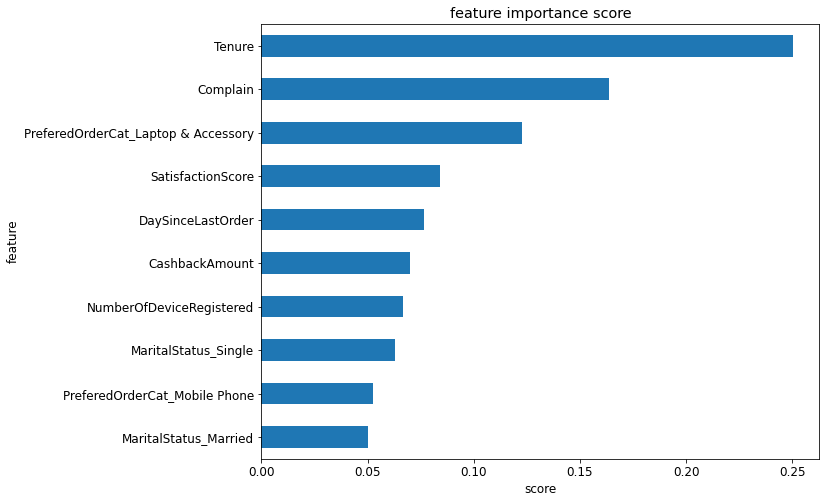

In [ ]:
show_feature_importance(xg)

The graph above shows the most decisive features in classifying whether a customer will leave the product/service (Churn) or not.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_under,y_under)
y_pred=xg_tuned.predict(X_test)
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


## Metrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[495 124]
 [ 14 127]]

True Positives(TP) =  495

True Negatives(TN) =  127

False Positives(FP) =  124

False Negatives(FN) =  14


<AxesSubplot:>

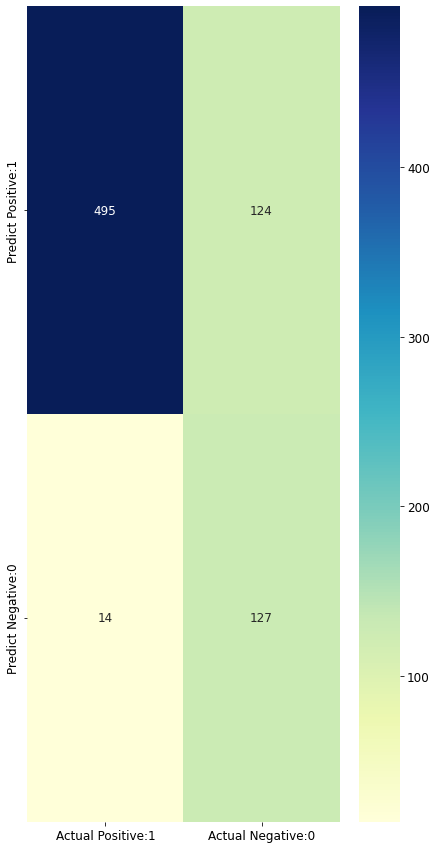

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       619
           1       0.51      0.90      0.65       141

    accuracy                           0.82       760
   macro avg       0.74      0.85      0.76       760
weighted avg       0.89      0.82      0.84       760



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)

print('Classification accuracy : {0:0.4f}'.format(accuracy))

Classification accuracy : 0.8184


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7997


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity or True Positive Rate : {0:0.4f}'.format(recall))

Recall or Sensitivity or True Positive Rate : 0.9725


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4940


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5060


## Test Underfitting or Overfitting

In [ ]:
print('Training set score: {:.4f}'.format(xg_tuned.score(X_under, y_under)))
print('Test set score: {:.4f}'.format(xg_tuned.score(X_test, y_test)))

Training set score: 0.9980
Test set score: 0.9007


The difference between the training set and the test set is < 0.1 so it can be concluded that the model does not experience underfitting or overfitting

## Null Accuracy

In [ ]:
y_test.value_counts()

0    619
1    141
Name: Churn, dtype: int64

In [ ]:
check_nullAccuracy(141,619)

Null accuracy score: 0.8145


The model can produce accuracy more than null accuracy so that the model created already meets null accuracy

## Threshold

In [ ]:
y_pred_prob = xg_tuned.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.5898671 , 0.41013286],
       [0.9830245 , 0.01697554],
       [0.86252826, 0.13747175],
       [0.99369675, 0.00630324],
       [0.99523264, 0.00476737],
       [0.00889802, 0.991102  ],
       [0.17628008, 0.8237199 ],
       [0.161026  , 0.838974  ],
       [0.0053975 , 0.9946025 ],
       [0.00841582, 0.9915842 ]], dtype=float32)

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Churn detected (1)', 'No Churn Detected (0)'])

y_pred_prob_df

,Churn detected (1),No Churn Detected (0)
0,0.589867,0.410133
1,0.983024,0.016976
2,0.862528,0.137472
3,0.993697,0.006303
4,0.995233,0.004767
5,0.008898,0.991102
6,0.176280,0.823720
7,0.161026,0.838974
8,0.005397,0.994603
9,0.008416,0.991584


In [ ]:
# store the predicted probabilities for class 1 - Probability of Churn

y_pred1 = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

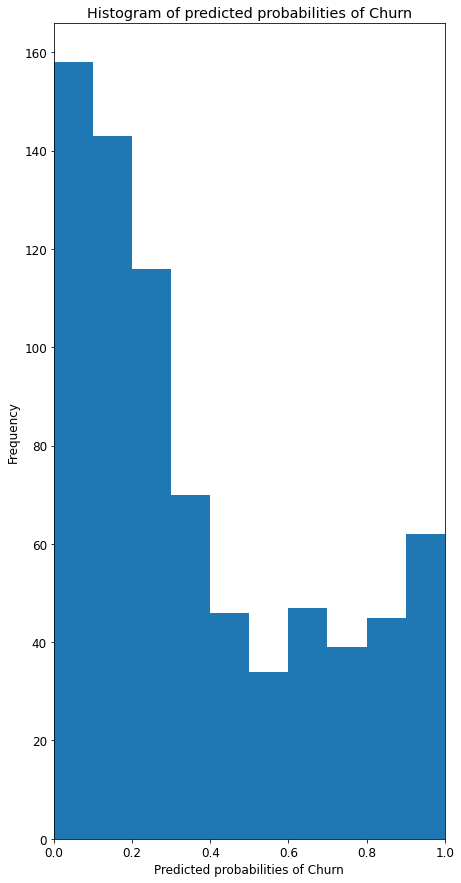

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Churn')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = xg_tuned.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1,  threshold=i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Precision: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])), '\n\n',
           
           'Recall or Sensitivity: ',cm1[0,0]/(float(cm1[0,0]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[368 251]
 [  4 137]] 

 with 505 correct predictions,  

 251 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.6644736842105263 

 Precision:  0.5945072697899838 

 Recall or Sensitivity:  0.989247311827957 

 Specificity:  0.5945072697899838 



With 0.2 threshold the Confusion Matrix is  

 [[423 196]
 [  8 133]] 

 with 556 correct predictions,  

 196 Type I errors( False Positives),  

 8 Type II errors( False Negatives),  

 Accuracy score:  0.7315789473684211 

 Precision:  0.6833602584814217 

 Recall or Sensitivity:  0.9814385150812065 

 Specificity:  0.6833602584814217 



With 0.3 threshold the Confusion Matrix is  

 [[453 166]
 [  9 132]] 

 with 585 correct predictions,  

 166 Type I errors( False Positives),  

 9 Type II errors( False Negatives),  

 Accuracy score:  0.7697368421052632 

 Precision:  0.7318255250403877 

 Recall or Sensitivity:  0.9805194805194806 

 Specif

In [ ]:

y_pred1 = xg_tuned.predict_proba(X_test)[:,1]

y_pred1 = y_pred1.reshape(-1,1)

y_pred2 = binarize(y_pred1, threshold= 0.6)

In [ ]:
y_pred2[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

The threshold of 0.6 is taken because it produces a very good evaluation value for accuracy, precision, recall and specificity

## ROC AUC

In [ ]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8549


ROC AUC model > 0.8 so the model is very good at differentiating between 2 classes

# Building Model Conclusion

After doing several processes, the best models, parameters and thresholds are obtained to detect whether the customer will leave the product/service (Churn) or not, namely:
* Model = XGBoostclassifier(random_state=42)
* Parameters =
     * Best max_depth: 20
     * Best min_child_weight: 6
     * Best gamma: 0.8
     * Best tree_method: approx
     * Best colsample_bytree: 0.9
     * Best eta: 0.595959595959596
     * Best lambda: 0.1
     * Best alpha: 0.30000000000000004
* Threshold = 0.6

With the best evaluation value:
* Accuracy = 87%
* Precision = 87%
* Recall/Sensitivity/TPR = 96%
* Specificity = 86%
* ROC-AUC = 86%
* No Overfitting
* Accuracy value exceeds null accuracy, which is > 81%

Additional insight is obtained that there are features that are most decisive in classifying whether a customer will leave a product/service (Churn) or not. The graphs and information have been shown in the cell above